In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
X_biased = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_biased.T.dot(X_biased)).dot(X_biased.T).dot(y)


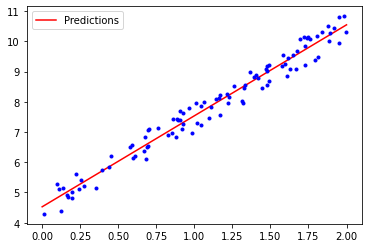

In [13]:
X_new = np.array([
    [0],
    [2],
])

X_new_biased = np.c_[np.ones((2, 1)), X_new]

y_pred = X_new_biased.dot(theta_best)

plt.plot(X_new, y_pred, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.legend()

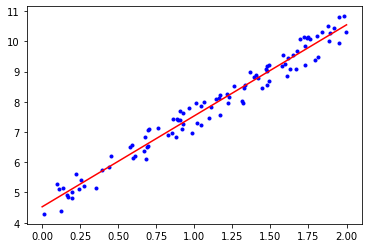

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

plt.plot(X, y, 'b.')
plt.plot(X_new, lin_reg.predict(X_new), 'r-')


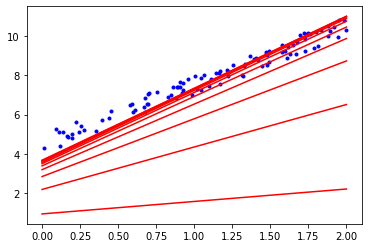

In [37]:
eta = 0.1 # learning rate
n_iterations = 10
m = 100

theta = np.random.rand(2, 1)

plt.plot(X, y, 'b.')

for iteration in range(n_iterations):
    plt.plot(X_new, X_new_biased.dot(theta), 'r-')
    gradients = 2 / X_biased.shape[0] * X_biased.T.dot(X_biased.dot(theta) - y)
    theta = theta - eta * gradients

In [49]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
 return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
 for i in range(X_biased.shape[0]):
     random_index = np.random.randint(X_biased.shape[0])

     xi = X_biased[random_index:random_index+1]
     yi = y[random_index:random_index+1]

     gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

     eta = learning_schedule(epoch * m + i)
     theta = theta - eta * gradients

theta



array([[4.51449459],
       [3.00777619]])

In [67]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.50490986]), array([3.05429825]))